In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

df = pd.read_csv("C:\\Users\\milan\\Documents\\BMSTU\\Modeling\\homework_2.csv", index_col=1)
df.head()

,Unnamed: 0,CustomerId,Surname,Score,Geography,Gender,Age,Tenure,Balance,NumOfProducts,Has,IsActiveMember,EstimatedSalary,Exited
Id,,,,,,,,,,,,,,
1,0,15634602,Hargrave,619,France,Female,42,1.0,83807.86,1,0,1,112542.58,0
2,1,15647311,Hill,608,Spain,Female,41,8.0,159660.80,3,1,0,113931.57,1
3,2,15619304,Onio,502,France,Female,42,1.0,0.00,2,0,0,93826.63,0
4,3,15701354,Boni,699,France,Female,39,2.0,125510.82,1,1,1,79084.10,0
5,4,15737888,Mitchell,850,Spain,Female,43,8.0,113755.78,2,1,0,149756.71,1


In [73]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.drop_duplicates()
df.head()

,CustomerId,Surname,Score,Geography,Gender,Age,Tenure,Balance,NumOfProducts,Has,IsActiveMember,EstimatedSalary,Exited
Id,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,1.0,83807.86,1,0,1,112542.58,0
2,15647311,Hill,608,Spain,Female,41,8.0,159660.80,3,1,0,113931.57,1
3,15619304,Onio,502,France,Female,42,1.0,0.00,2,0,0,93826.63,0
4,15701354,Boni,699,France,Female,39,2.0,125510.82,1,1,1,79084.10,0
5,15737888,Mitchell,850,Spain,Female,43,8.0,113755.78,2,1,0,149756.71,1


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       100 non-null    int64  
 1   Surname          100 non-null    object 
 2   Score            100 non-null    int64  
 3   Geography        100 non-null    object 
 4   Gender           100 non-null    object 
 5   Age              100 non-null    int64  
 6   Tenure           94 non-null     float64
 7   Balance          100 non-null    float64
 8   NumOfProducts    100 non-null    int64  
 9   Has              100 non-null    int64  
 10  IsActiveMember   100 non-null    int64  
 11  EstimatedSalary  100 non-null    float64
 12  Exited           100 non-null    int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 10.9+ KB


In [75]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df.describe()

,CustomerId,Score,Age,Tenure,Balance,NumOfProducts,Has,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000
mean,1.567823e+07,639.530000,38.030000,5.140000,72023.660100,1.510000,0.690000,0.500000,97366.42010,0.21000
std,7.003007e+04,112.652093,8.228375,2.655355,62534.675768,0.594503,0.464823,0.502519,55088.09138,0.40936
min,1.556654e+07,376.000000,24.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1914.41000,0.00000
25%,1.561006e+07,550.000000,32.750000,3.000000,0.000000,1.000000,0.000000,0.000000,53473.70000,0.00000
50%,1.568169e+07,634.000000,38.000000,5.000000,86846.455000,1.000000,1.000000,0.500000,97755.36500,0.00000
75%,1.573691e+07,726.000000,43.250000,7.000000,126071.762500,2.000000,1.000000,1.000000,139033.94000,0.00000
max,1.581466e+07,850.000000,61.000000,10.000000,183579.540000,4.000000,1.000000,1.000000,196526.55000,1.00000


<AxesSubplot:>

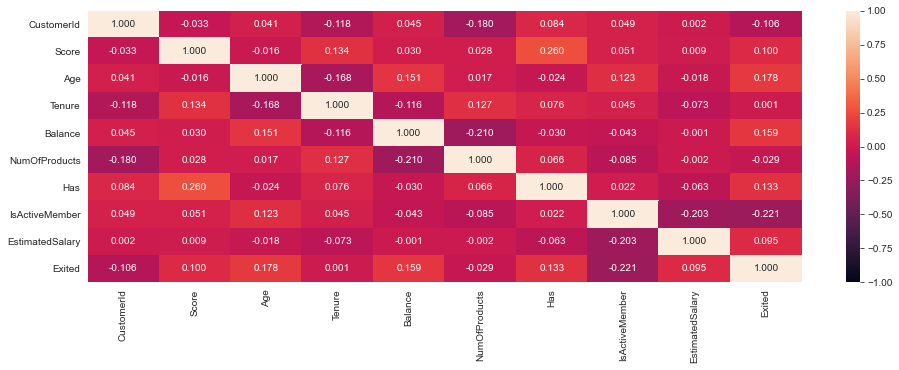

In [76]:
corr = df.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, vmax=1, vmin=-1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".3f")

In [77]:
df.isnull().sum()

CustomerId         0
Surname            0
Score              0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
Has                0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [78]:
df[df['Tenure'].isnull()]

,CustomerId,Surname,Score,Geography,Gender,Age,Tenure,Balance,NumOfProducts,Has,IsActiveMember,EstimatedSalary,Exited
Id,,,,,,,,,,,,,


In [79]:
df.isnull().sum()

CustomerId         0
Surname            0
Score              0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
Has                0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [80]:
df.apply(pd.unique)

CustomerId         [15634602, 15647311, 15619304, 15701354, 15737...
Surname            [Hargrave, Hill, Onio, Boni, Mitchell, Chu, Ba...
Score              [619, 608, 502, 699, 850, 645, 822, 376, 501, ...
Geography                                   [France, Spain, Germany]
Gender                                                [Female, Male]
Age                [42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...
Tenure             [1.0, 8.0, 2.0, 7.0, 4.0, 6.0, 3.0, 10.0, 5.0,...
Balance            [83807.86, 159660.8, 0.0, 125510.82, 113755.78...
NumOfProducts                                           [1, 3, 2, 4]
Has                                                           [0, 1]
IsActiveMember                                                [1, 0]
EstimatedSalary    [112542.58, 113931.57, 93826.63, 79084.1, 1497...
Exited                                                        [0, 1]
dtype: object

In [81]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df.head(10)

,CustomerId,Surname,Score,Geography,Age,Tenure,Balance,NumOfProducts,Has,IsActiveMember,EstimatedSalary,Exited,Gender_Male
Id,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,42,1.0,83807.86,1,0,1,112542.58,0,0
2,15647311,Hill,608,Spain,41,8.0,159660.80,3,1,0,113931.57,1,0
3,15619304,Onio,502,France,42,1.0,0.00,2,0,0,93826.63,0,0
4,15701354,Boni,699,France,39,2.0,125510.82,1,1,1,79084.10,0,0
5,15737888,Mitchell,850,Spain,43,8.0,113755.78,2,1,0,149756.71,1,0
6,15574012,Chu,645,Spain,44,7.0,0.00,2,1,1,10062.80,0,1
7,15592531,Bartlett,822,France,50,4.0,115046.74,4,1,0,119346.88,1,1
8,15656148,Obinna,376,Germany,29,4.0,142051.07,2,0,1,74940.50,0,0
9,15792365,He,501,France,44,2.0,134603.88,1,1,1,71725.73,0,1


In [82]:
df = pd.get_dummies(df, columns=['Geography'], prefix='From')
df.head()

,CustomerId,Surname,Score,Age,Tenure,Balance,NumOfProducts,Has,IsActiveMember,EstimatedSalary,Exited,Gender_Male,From_France,From_Germany,From_Spain
Id,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,1.0,83807.86,1,0,1,112542.58,0,0,1,0,0
2,15647311,Hill,608,41,8.0,159660.80,3,1,0,113931.57,1,0,0,0,1
3,15619304,Onio,502,42,1.0,0.00,2,0,0,93826.63,0,0,1,0,0
4,15701354,Boni,699,39,2.0,125510.82,1,1,1,79084.10,0,0,1,0,0
5,15737888,Mitchell,850,43,8.0,113755.78,2,1,0,149756.71,1,0,0,0,1


In [83]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)


In [84]:
df.head(10)

,Score,Age,Tenure,Balance,NumOfProducts,Has,IsActiveMember,EstimatedSalary,Exited,Gender_Male,From_France,From_Germany,From_Spain
Id,,,,,,,,,,,,,
1,619,42,1.0,83807.86,1,0,1,112542.58,0,0,1,0,0
2,608,41,8.0,159660.80,3,1,0,113931.57,1,0,0,0,1
3,502,42,1.0,0.00,2,0,0,93826.63,0,0,1,0,0
4,699,39,2.0,125510.82,1,1,1,79084.10,0,0,1,0,0
5,850,43,8.0,113755.78,2,1,0,149756.71,1,0,0,0,1
6,645,44,7.0,0.00,2,1,1,10062.80,0,1,0,0,1
7,822,50,4.0,115046.74,4,1,0,119346.88,1,1,1,0,0
8,376,29,4.0,142051.07,2,0,1,74940.50,0,0,0,1,0
9,501,44,2.0,134603.88,1,1,1,71725.73,0,1,1,0,0


<AxesSubplot:>

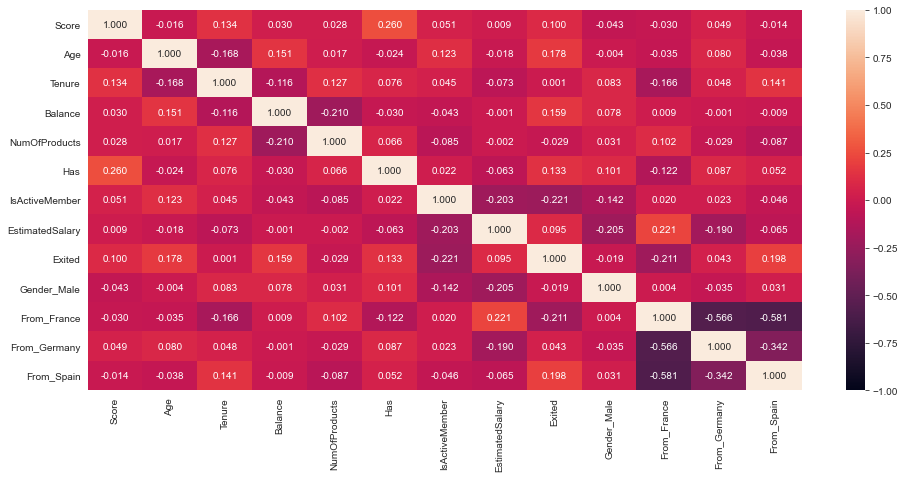

In [85]:
corr = df.corr()
plt.figure(figsize = (16,7))
sns.heatmap(corr, vmax=1, vmin=-1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".3f")

$\begin{equation}
Precision = \frac{TP}{TP + FP}
\end{equation}$



$\begin{equation}
Recall = \frac{TP}{TP + FN}
\end{equation}
$



$\begin{equation}
F_{\beta} = (1 + \beta^2) \cdot \frac{Precision \cdot Recall}{(\beta^2 \cdot Precision) + Recall}
\end{equation}$

$\begin{equation}
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
\end{equation}$

In [90]:
TARGET = 'Exited'

RANDOM_STATE = np.random.RandomState(1080)

def get_features(data, scaler = None):
    result = data.drop([TARGET], axis=1)
    if scaler is not None:
        result = scaler.transform(result)
    return result

def get_model_and_scaler(data, classifier):
    target = data[TARGET]
    features = get_features(data)
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    classifier.fit(features_train, target_train)

    predictions_valid = classifier.predict(features_valid)

    accuracy = metrics.accuracy_score(target_valid, predictions_valid)
    precision = metrics.precision_score(target_valid, predictions_valid)
    recall = metrics.recall_score(target_valid, predictions_valid)
    f1_score = metrics.f1_score(target_valid, predictions_valid)
    print(f'accuracy: {accuracy}')
    print(f'precision: {precision}')
    print(f'recall: {recall}')
    print(f'f1-метрика: {f1_score}')


In [91]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(solver='newton-cg', class_weight='balanced', random_state=RANDOM_STATE)
get_model_and_scaler(df.copy(), logistic_regression)

accuracy: 0.68
precision: 0.25
recall: 0.5
f1-метрика: 0.3333333333333333


In [92]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=3, random_state=RANDOM_STATE)
get_model_and_scaler(df.copy(), random_forest)

accuracy: 0.8
precision: 0.6666666666666666
recall: 0.3333333333333333
f1-метрика: 0.4444444444444444


In [93]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
get_model_and_scaler(df.copy(), decision_tree)

accuracy: 0.72
precision: 0.5
recall: 0.42857142857142855
f1-метрика: 0.4615384615384615
